<h2 style="color:blue" align="center">Handwritten digits classification using CNN</h2>

In this notebook we will classify handwritten digits using a simple neural network (ANN) first and than repeat same thing with convolutional neural network. We will see how accuracy improves clickly when you use convolutional neural network.

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [28]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [29]:
X_train.shape

(60000, 28, 28)

In [30]:
X_test.shape

(10000, 28, 28)

In [31]:
X_train[0].shape

(28, 28)

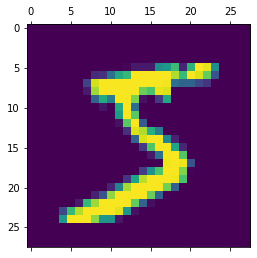

In [32]:
plt.matshow(X_train[0])

In [33]:
y_train[0]

5

In [34]:
X_train = X_train / 255
X_test = X_test / 255

<h3 style='color:purple'>Using ANN for classification</h3>

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 924us/step - loss: 0.2885 - accuracy: 0.9194
Epoch 2/10
1875/1875 [==============================] - 2s 920us/step - loss: 0.1363 - accuracy: 0.9603
Epoch 3/10
1875/1875 [==============================] - 2s 925us/step - loss: 0.0993 - accuracy: 0.9704
Epoch 4/10
1875/1875 [==============================] - 2s 929us/step - loss: 0.0765 - accuracy: 0.9771
Epoch 5/10
1875/1875 [==============================] - 2s 943us/step - loss: 0.0620 - accuracy: 0.9808
Epoch 6/10
1875/1875 [==============================] - 2s 938us/step - loss: 0.0509 - accuracy: 0.9843
Epoch 7/10
1875/1875 [==============================] - 2s 956us/step - loss: 0.0414 - accuracy: 0.9876
Epoch 8/10
1875/1875 [==============================] - 2s 971us/step - loss: 0.0363 - accuracy: 0.9887
Epoch 9/10
1875/1875 [==============================] - 2s 961us/step - loss: 0.0301 - accuracy: 0.9905
Epoch 10/10
1875/1875 [==============================] - 2s 963u

In [11]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 988us/step - loss: 0.0831 - accuracy: 0.9780


[0.0830635279417038, 0.9779999852180481]

In [35]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [40]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

<h3 style='color:purple'>Using CNN for classification</h3>

In [59]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [60]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1739 - accuracy: 0.9488
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0610 - accuracy: 0.9814
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0398 - accuracy: 0.9872
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0291 - accuracy: 0.9909
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0207 - accuracy: 0.9934


In [61]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [56]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0541 - accuracy: 0.9843


[0.05414153262972832, 0.9843000173568726]